In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lomb_scargle import lomb_scargle, top_freqs
from util import where, where_eq

In [16]:
data_epoch = pd.read_csv('epoch_photometry_data.csv', index_col=0)
chi_square_data = pd.read_csv('chi_square_data.csv', index_col=0)
data_source = pd.read_csv('jobresult03_parallax_filter.csv')

In [17]:
sid_over3 = where(chi_square_data['chi_square_g'] > 3, df=chi_square_data)['source_id']
sid_over3

0        383805836714177920
1        385497744590070912
4        385515989612893696
13       385518463514158976
15       385519700463795456
                ...        
64480    376177665558693632
64483    376178284033903104
64493    376179761502718080
64495    376179864581949824
64498    376181754367604096
Name: source_id, Length: 15506, dtype: int64

In [18]:
tmp = where(data_source['phot_g_n_obs'] > 300, df=data_source)
sid_over3_n = where(tmp['source_id'].isin(sid_over3), df=tmp)['source_id']
sid_over3_n

0        383805836714177920
4        385515989612893696
13       385518463514158976
15       385519700463795456
20       385524308965613312
                ...        
64480    376177665558693632
64483    376178284033903104
64493    376179761502718080
64495    376179864581949824
64498    376181754367604096
Name: source_id, Length: 8107, dtype: int64

In [19]:
tmp = where(data_source['phot_variable_flag'] == 'VARIABLE', df=data_source)
sid_over3_n_var = where(tmp['source_id'].isin(sid_over3_n), df=tmp)['source_id']
sid_over3_n_var

21       385524824361687040
38       385623054556280832
105      385642467808657408
114      383377817452439168
120      385645594544900864
                ...        
64446    376170007633216512
64465    376174405678861824
64470    376174710621088256
64480    376177665558693632
64498    376181754367604096
Name: source_id, Length: 2146, dtype: int64

In [20]:
tmp = where(data_source['phot_variable_flag'] == 'VARIABLE', df=data_source)
sid_over3_var = where(tmp['source_id'].isin(sid_over3), df=tmp)['source_id']
sid_over3_var

1        385497744590070912
21       385524824361687040
38       385623054556280832
105      385642467808657408
114      383377817452439168
                ...        
64460    376172855195389056
64465    376174405678861824
64470    376174710621088256
64480    376177665558693632
64498    376181754367604096
Name: source_id, Length: 3121, dtype: int64

In [21]:
sid_over3_n_var.to_csv('sid_list_filter_chi_n_var.csv')

In [22]:
data_epoch_filtered = where(data_epoch['source_id'].isin(sid_over3_n_var), data_epoch)
data_epoch_filtered

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
2401,385524824361687040,16615864877733604,G,1697.336092,20.129801,167.119241,6.561247,25.470654,False,False,5,375316653866487564
2402,385524824361687040,21114477248177644,G,1778.692404,20.099923,171.781997,5.608561,30.628530,False,False,1,375316653866487564
2403,385524824361687040,21124218052944807,G,1778.868555,20.155833,163.159925,5.944157,27.448792,False,False,4097,375316653866487564
2404,385524824361687040,21128310311395593,G,1778.942559,20.118897,168.806027,3.209004,52.603863,False,False,1,375316653866487564
2405,385524824361687040,21404953224319089,G,1783.945299,20.144310,164.900741,5.471468,30.138302,False,False,1,375316653866487564
...,...,...,...,...,...,...,...,...,...,...,...,...
383328,376181754367604096,72209448324313750,RP,2702.711167,20.579753,46.479040,16.570352,2.804952,False,False,0,375316653866487564
383329,376181754367604096,72213540613051271,RP,2702.785178,19.344831,144.952530,21.814234,6.644860,False,False,0,375316653866487564
383330,376181754367604096,72223281379955535,RP,2702.961342,19.487378,127.118000,19.834691,6.408872,False,False,0,375316653866487564
383331,376181754367604096,72227373630944371,RP,2703.035353,19.246035,158.761075,21.744993,7.301041,False,False,0,375316653866487564


In [23]:
ls_g = lomb_scargle('G', epoch_data=data_epoch_filtered, sid_list=sid_over3_n_var)
ls_rp = lomb_scargle('RP', epoch_data=data_epoch_filtered, sid_list=sid_over3_n_var)
ls_bp = lomb_scargle('BP', epoch_data=data_epoch_filtered, sid_list=sid_over3_n_var)

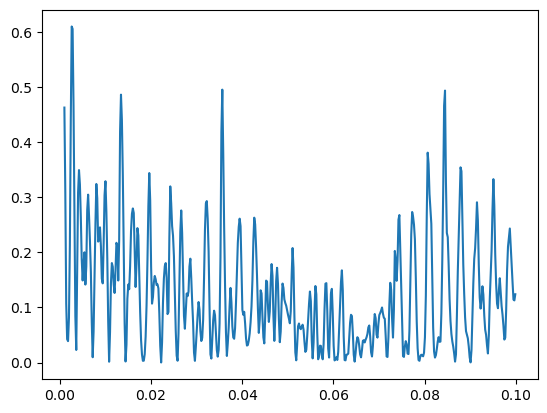

In [24]:
f, p = ls_g[385524824361687040]
plt.plot(f, p)

In [25]:
top_freqs(f, p)

array([0.03563648, 0.0028019 , 0.00260169])

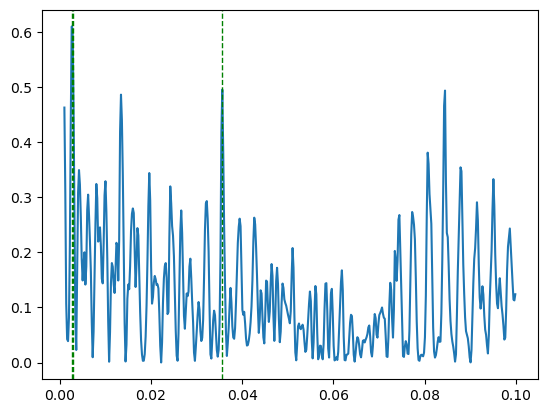

In [26]:
plt.plot(f, p)

for ff in top_freqs(f, p):
    plt.axvline(ff, ls='--', lw=1, c='g')